# Exercise 6.05 - k-means clustering algorithm fro MOTOGP project

To determine which of the dowloaded MOTOGP files could be used to run a k-means clustering algorithm, we need to check if the data in those files meet the requirements for k-means clustering:

a) K-means requires numerical data.

b) Categorical data must be encoded numerically or otherwise transformed.

c) The data should be in a format where each row is an observation and each column is a feature (variable)

## The file I have selected is: riders-info.csv
Columns:

Riders All Time in All Classes,

Victories,

2nd places,

3rd places,

Pole positions from '74 to 2022,

Race fastest lap to 2022, World Championships.

Data: Multiple numerical columns (Victories, 2nd places, etc.), plus a categorical column (rider name).

Suitability: This file is suitable for k-means clustering.

The numerical columns can be used as features to cluster riders based on their career statistics

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Creating path for importing data from original folder,
path1='/home/haus/Scrivania/Exercise_6/Exercise_6.05/01_Original_Data'
# Creating path for saving data after cleaning process,
path2='/home/haus/Scrivania/Exercise_6/Exercise_6.05/02_Prepared_Data'
# Creating path for saving charts
path3='/home/haus/Scrivania/Exercise_6/Exercise_6.05/03_Visualisations'

In [8]:
# Importing file
df = pd.read_csv(path1+'/riders-info.csv')

In [10]:
df.shape

(368, 7)

In [12]:
df.describe()

,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships
count,368.000000,339.000000,320.000000,226.000000,295.000000,114.000000
mean,8.679348,8.495575,8.068750,9.769912,9.542373,2.385965
std,14.460711,9.092676,7.001229,12.798964,13.931956,2.425925
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000
50%,4.000000,6.000000,6.000000,5.000000,5.000000,1.000000
75%,9.250000,11.000000,11.000000,12.000000,11.000000,3.000000
max,122.000000,67.000000,53.000000,90.000000,117.000000,15.000000


In [14]:
df.columns

Index(['Riders All Time in All Classes', 'Victories', '2nd places',
       '3rd places', 'Pole positions from '74 to 2022',
       'Race fastest lap to 2022', 'World Championships'],
      dtype='object')

In [16]:
df.dtypes

Riders All Time in All Classes      object
Victories                            int64
2nd places                         float64
3rd places                         float64
Pole positions from '74 to 2022    float64
Race fastest lap to 2022           float64
World Championships                float64
dtype: object

In [18]:
# Remove categorical columns (only keep numerical) 
# The first column is the rider's name, so drop it
df_num = df.drop(columns=['Riders All Time in All Classes'])

In [20]:
# Convert all columns to numeric, coerce errors to NaN
df_num = df_num.apply(pd.to_numeric, errors='coerce')

In [22]:
# Drop rows with missing values
df_num_clean = df_num.dropna().reset_index(drop=True)

In [24]:
# Save cleaned data
df_num_clean.to_csv(os.path.join(path2, 'riders-info_clean.csv'), index=False)

### Standardize Data 
Variables have very different scales (for example, “Victories” ranges from 0–100, but “World Championships” is 0–15), then variables with bigger numbers will have a much bigger influence on the clustering.
Standardizing puts all variables on the same scale, so each feature contributes equally.

In [27]:
# Create the scaler object
scaler = StandardScaler()

In [29]:
# Fit the scaler to our data and transform it
# This will make each column have mean 0 and standard deviation 1
df_scaled = scaler.fit_transform(df_num_clean)

In [31]:
# This command turn it back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df_num_clean.columns)

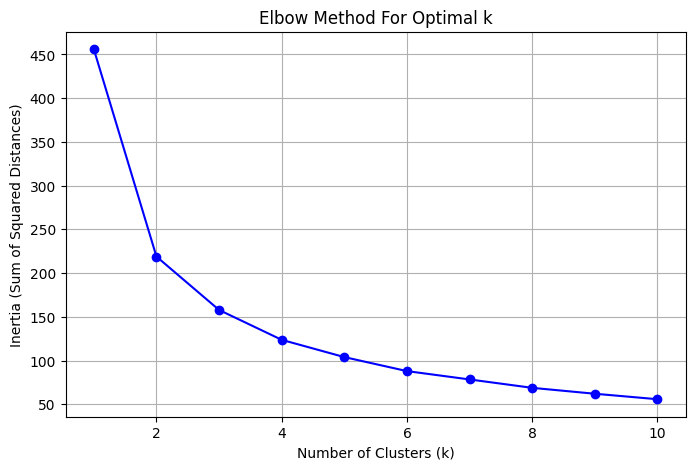

In [33]:
# Elbow Technique
inertia = []  # This will store the sum of squared distances for each k
K = range(1, 11)  # Try k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Save the inertia for this k

# Plot the results so we can see the 'elbow'
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.savefig(os.path.join(path3, 'elbow_chart.png'))
plt.show()

## Decide Number of Clusters
I chose the number of clusters where the elbow curve bends and inertia reduction slows down.
Usually, this is where the line starts to flatten.
For this dataset, let’s say the elbow is at k=3.

## Run K-Means

In [36]:
# Let's use k=3 (adjust if your elbow plot suggests differently)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Attach cluster labels to the cleaned DataFrame
df_num_clean['Cluster'] = clusters

In [38]:
# Save Data with Clusters
df_num_clean.to_csv(os.path.join(path2, 'riders-info_with_clusters.csv'), index=False)

## Vsualisations

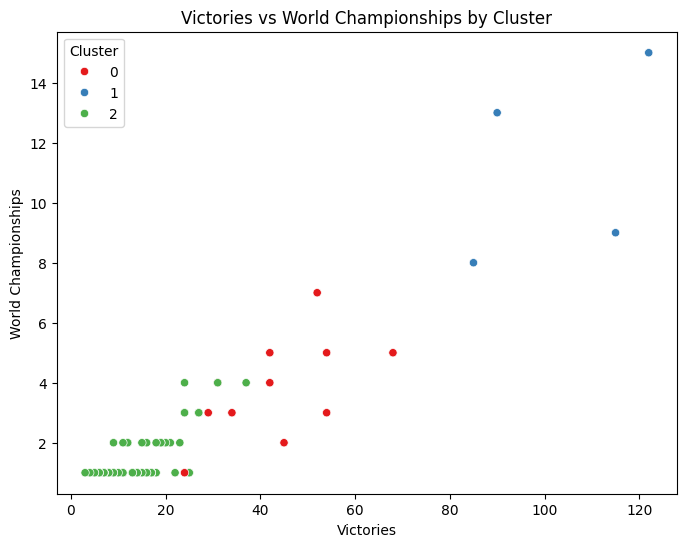

In [45]:
# Example scatterplot: Victories vs World Championships
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Victories', y='World Championships',
    hue='Cluster', palette='Set1',
    data=df_num_clean
)
plt.title('Victories vs World Championships by Cluster')
plt.savefig(os.path.join(path3, 'scatter_victories_wc.png'))
plt.show()

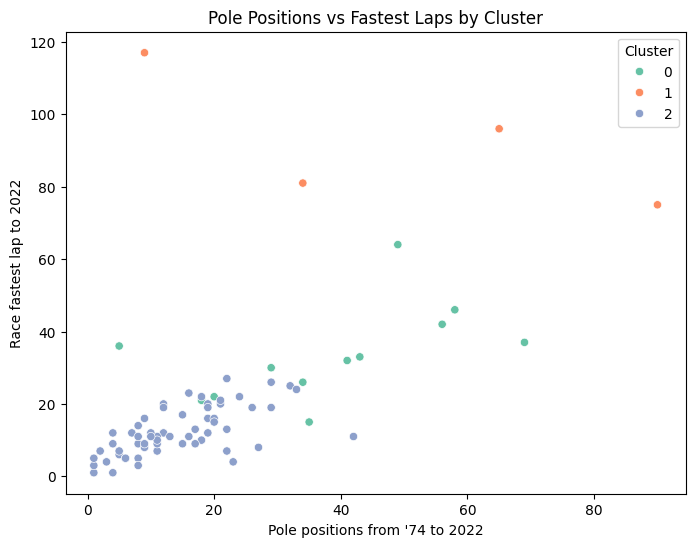

In [47]:
# Example scatterplot: Pole positions vs Race fastest lap
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Pole positions from '74 to 2022", y='Race fastest lap to 2022',
    hue='Cluster', palette='Set2',
    data=df_num_clean
)
plt.title("Pole Positions vs Fastest Laps by Cluster")
plt.savefig(os.path.join(path3, 'scatter_pole_fastlap.png'))
plt.show()

## Do the Clusters Make Sense?
The clusters seem to group riders by their career achievements. For example, one cluster may include riders with many victories and championships, while another has riders with fewer wins. This makes sense because k-means groups similar statistical profiles together. If clusters overlap a lot, it may mean that more features or a different clustering method is needed.

## Thoughts
I learned that standardizing the data is important for fair clustering. The elbow method helps choose k, but sometimes the choice is not obvious. The clusters mostly separate top riders from mid-level and lower-achieving riders

## Descriptive Statistics by Cluster

In [52]:
# Calculate mean stats for each cluster
cluster_stats = df_num_clean.groupby('Cluster').mean()
print(cluster_stats)

          Victories  2nd places  3rd places  Pole positions from '74 to 2022  \
Cluster                                                                        
0         41.833333   35.166667   26.166667                        38.083333   
1        103.000000   43.250000   21.500000                        49.500000   
2         14.466667   12.200000   10.816667                        14.316667   

         Race fastest lap to 2022  World Championships  
Cluster                                                 
0                       33.666667                 3.75  
1                       92.250000                11.25  
2                       12.333333                 1.50  


The descriptive statistics show that Cluster 0 (for example) has the highest average victories and championships, indicating it contains the most successful riders. Cluster 2 might have lower averages, showing it groups less successful riders.

## Future Use

These clusters could help teams or analysts identify different types of riders, compare performance profiles, or target training. In future analytics, we could use cluster labels to predict race outcomes or recommend strategies for different rider types

# Close